In [5]:
from PIL import Image
image = Image.open("72.png")
image.size

(40, 669)

In [6]:
import os
from PIL import Image
import numpy as np

# Define your directories
directories = ['dataset/DB', 'dataset/DT', 'dataset/HH', 'dataset/HL', 'dataset/LH', 'dataset/LL']

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each directory
for i, dir in enumerate(directories):
    # Loop through each file in the directory
    for filename in os.listdir(dir):
        # Ensure the file is an image
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Open the image file
            img = Image.open(os.path.join(dir, filename))
            # Convert the image to a numpy array and append it to the images list
            images.append(np.array(img))
            # Append the corresponding label to the labels list
            labels.append(i)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
X_train.shape, y_train.shape

((4168, 669, 40, 3), (4168,))

In [8]:
X_train[0]

array([[[166, 160, 180],
        [166, 160, 180],
        [166, 160, 180],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [170, 170, 170]],

       [[166, 160, 180],
        [166, 160, 180],
        [166, 160, 180],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [170, 170, 170]],

       [[166, 160, 180],
        [166, 160, 180],
        [166, 160, 180],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [170, 170, 170]],

       ...,

       [[166, 160, 180],
        [166, 160, 180],
        [166, 160, 180],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [170, 170, 170]],

       [[166, 160, 180],
        [166, 160, 180],
        [166, 160, 180],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [170, 170, 170]],

       [[166, 160, 180],
        [166, 160, 180],
        [166, 160, 180],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [170, 170, 170]]

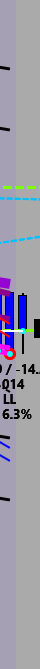

In [9]:
Image.fromarray(X_train[0])

In [10]:
y_train

array([5, 2, 4, ..., 5, 5, 2])

In [11]:
def preprocess_data(X_train, X_test):
    # Normalize the pixel values
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    # # One-hot encode the labels
    # y_train = tf.keras.utils.to_categorical(y_train)
    return X_train, X_test

In [12]:
import os

def preprocess_data(X, batch_size, output_dir):
    num_samples = len(X)
    num_batches = num_samples // batch_size + 1 if num_samples % batch_size != 0 else num_samples // batch_size
    
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, num_samples)
        
        batch_X = X[start_idx:end_idx]
        batch_X = batch_X / 255.0  # Normalize pixel values
        
        np.save(os.path.join(output_dir, f'batch_{i}.npy'), batch_X)

# # Define batch size for preprocessing
# preprocess_batch_size = 10000
# # Define output directory for preprocessed batches
# output_dir_train = 'preprocessed_train'
# output_dir_test = 'preprocessed_test'

# # Create output directories if they don't exist
# os.makedirs(output_dir_train, exist_ok=True)
# os.makedirs(output_dir_test, exist_ok=True)

# # Preprocess training data
# preprocess_data(X_train, preprocess_batch_size, output_dir_train)

# # Preprocess test data
# preprocess_data(X_test, preprocess_batch_size, output_dir_test)


In [13]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

def preprocess_data(directories, test_size, batch_size, output_dir):
    for i, dir in enumerate(directories):
        images = []
        labels = []

        # Loop through each file in the directory
        for filename in os.listdir(dir):
            # Ensure the file is an image
            if filename.endswith('.jpg') or filename.endswith('.png'):
                # Open the image file
                img = Image.open(os.path.join(dir, filename))
                # Convert the image to a numpy array and append it to the images list
                images.append(np.array(img))
                # Append the corresponding label to the labels list
                labels.append(i)

        # Convert lists to numpy arrays
        X = np.array(images)
        y = np.array(labels)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Define batch size for preprocessing
        num_samples_train = len(X_train)
        num_batches_train = num_samples_train // batch_size + 1 if num_samples_train % batch_size != 0 else num_samples_train // batch_size

        num_samples_test = len(X_test)
        num_batches_test = num_samples_test // batch_size + 1 if num_samples_test % batch_size != 0 else num_samples_test // batch_size

        # Create output directories if they don't exist
        train_dir = os.path.join(output_dir, 'train', f'class_{i}')
        test_dir = os.path.join(output_dir, 'test', f'class_{i}')
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)

        # Preprocess training data
        for i in range(num_batches_train):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, num_samples_train)
            batch_X = X_train[start_idx:end_idx]

            for j in range(len(batch_X)):
                np.save(os.path.join(train_dir, f'batch_{i * batch_size + j}.npy'), batch_X[j])

        # Preprocess test data
        for i in range(num_batches_test):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, num_samples_test)
            batch_X = X_test[start_idx:end_idx]

            for j in range(len(batch_X)):
                np.save(os.path.join(test_dir, f'batch_{i * batch_size + j}.npy'), batch_X[j])

# Define your directories
directories = ['dataset/DB', 'dataset/DT', 'dataset/HH', 'dataset/HL', 'dataset/LH', 'dataset/LL']

# Define test size and batch size for preprocessing
test_size = 0.2
preprocess_batch_size = 100

# Define output directory for preprocessed batches
output_dir = 'preprocessed_data'

# Preprocess the data
preprocess_data(directories, test_size, preprocess_batch_size, output_dir)


Model for small Datasets

In [14]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define your neural network architecture
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define input shape and number of classes
input_shape = (669, 40, 3)  # Adjust according to your image dimensions
num_classes = 6

# Define batch size
batch_size = 32

# Define output directory for preprocessed batches
preprocessed_train_dir = os.path.join('preprocessed_data', 'train')
preprocessed_test_dir = os.path.join('preprocessed_data', 'test')

# Create and compile the model
model = create_model(input_shape, num_classes)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load preprocessed data for training
train_data = []
train_labels = []

for i in range(num_classes):
    class_train_data = []
    class_train_labels = []

    class_train_dir = os.path.join(preprocessed_train_dir, f'class_{i}')
    for file in os.listdir(class_train_dir):
        if file.endswith('.npy'):
            data = np.load(os.path.join(class_train_dir, file))
            class_train_data.append(data)
            class_train_labels.append(i)

    train_data.extend(class_train_data)
    train_labels.extend(class_train_labels)

train_X = np.array(train_data)
train_y = np.array(train_labels)

# Shuffle training data
indices = np.arange(len(train_X))
np.random.shuffle(indices)
train_X = train_X[indices]
train_y = train_y[indices]

# Reshape images to the correct shape
train_X = train_X.reshape((-1,) + input_shape)

# Create training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y)).shuffle(len(train_X)).batch(batch_size)

# Train the model
model.fit(train_dataset, epochs=5)



Epoch 1/5
131/131 [==============================] - 33s 242ms/step - loss: 9.6642 - accuracy: 0.8070
Epoch 2/5
131/131 [==============================] - 32s 245ms/step - loss: 0.1794 - accuracy: 0.9501
Epoch 3/5
131/131 [==============================] - 33s 254ms/step - loss: 0.0525 - accuracy: 0.9873
Epoch 4/5
131/131 [==============================] - 34s 255ms/step - loss: 0.0089 - accuracy: 0.9978
Epoch 5/5
131/131 [==============================] - 33s 254ms/step - loss: 0.0011 - accuracy: 0.9998


In [15]:
# Save the model
model.save('mask_model_v2.2.h5')

c:\Users\sehre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# Load preprocessed data for testing
test_data = []
test_labels = []

for i in range(num_classes):
    class_test_data = []
    class_test_labels = []

    class_test_dir = os.path.join(preprocessed_test_dir, f'class_{i}')
    for file in os.listdir(class_test_dir):
        if file.endswith('.npy'):
            data = np.load(os.path.join(class_test_dir, file))
            class_test_data.append(data)
            class_test_labels.append(i)

    test_data.extend(class_test_data)
    test_labels.extend(class_test_labels)

test_X = np.array(test_data)
test_y = np.array(test_labels)

# Shuffle testing data
indices = np.arange(len(test_X))
np.random.shuffle(indices)
test_X = test_X[indices]
test_y = test_y[indices]

# Reshape images to the correct shape
test_X = test_X.reshape((-1,) + input_shape)

In [17]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_y)).shuffle(len(test_X)).batch(batch_size)

# Evaluate the model (optional)
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

33/33 [==============================] - 2s 50ms/step - loss: 0.0163 - accuracy: 0.9952
Test accuracy: 0.9952152967453003


In [18]:
# Load the model
model = tf.keras.models.load_model('mask_model_v2.2.h5')

# Make predictions
predictions = model.predict(test_X)

# Convert the one-hot encoded predictions to labels
predictions = tf.argmax(predictions, axis=1)

# Display the true labels and the predicted labels
true_labels = test_y[:5]
print('True labels:', true_labels)
print('Predicted labels:', predictions[:5])


33/33 [==============================] - 2s 56ms/step
True labels: [0 4 5 5 3]
Predicted labels: tf.Tensor([0 4 5 5 3], shape=(5,), dtype=int64)


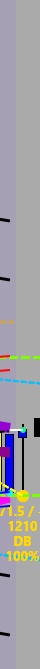

In [19]:
Image.fromarray(test_X[0])

Accuracy: 0.9952153110047847


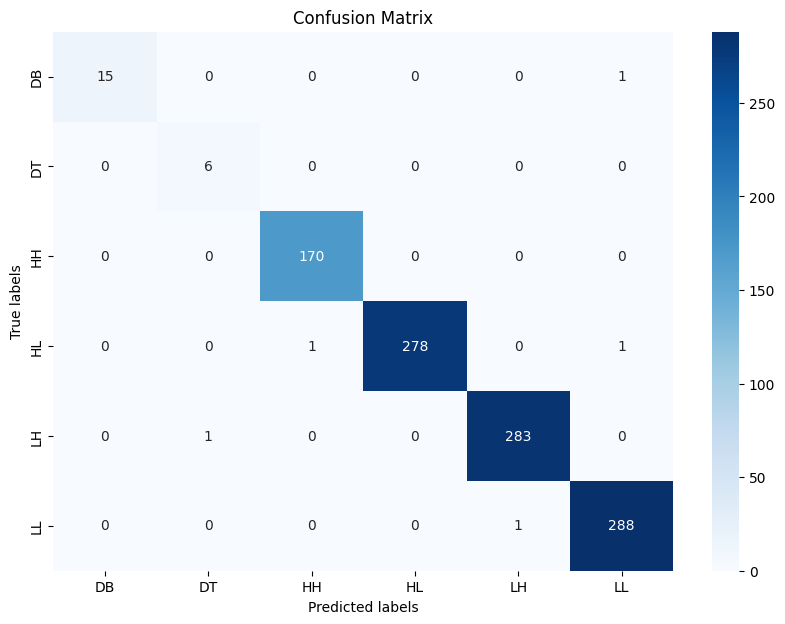

In [20]:
# Calculate the accuracy of the model
accuracy = np.mean(test_y == predictions)
print('Accuracy:', accuracy)

# Display the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

directories = ['DB', 'DT', 'HH', 'HL', 'LH', 'LL']
cm = confusion_matrix(test_y, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=directories, yticklabels=directories, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Load the model
model = tf.keras.models.load_model('mask_model_v2.h5')

# Test the model
img = Image.open('dataset/HH/6991.png')

img = np.array(img)
img = img / 255.0
img = img[np.newaxis, ...]

prediction = model.predict(img)
prediction = np.argmax(prediction)

if prediction == 0:
    print('DT')
elif prediction == 1:
    print('HH')
elif prediction == 2:
    print('HL')
elif prediction == 3:
    print('LH')
else:
    print('LL')


1/1 [==============================] - 0s 56ms/step
HL


In [22]:
import tensorflow as tf
print(tf.__version__)

2.13.1
